# Tidy and explore tabular data with pandas
#### A *Python for Reproducible Research* workshop

Welcome! In this lesson, you'll get a crash course in bringing your tabular research data into Python. 

We will focuses on **pandas**, a key part of the scientific Python ecosystem. We'll also introduce you to **NumPy**, the powerful framework underlying pandas and **matplotlib**, a visualization library already integrated into pandas. (We'll use the **seaborn** visualization library briefly too). Everything we do today will happen in this **Jupyter Notebook** - a tool for composing and sharing computational narratives that is becoming increasingly popular across the sciences.

At the end, you'll have written a data analysis recipe you can apply to future datasets and research questions. One way to think of this kind of recipe is a **data science pipeline**.

In [0]:
from IPython.display import Image

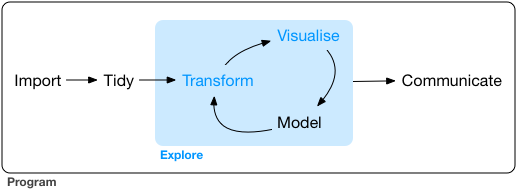

In [2]:
Image('https://d33wubrfki0l68.cloudfront.net/795c039ba2520455d833b4034befc8cf360a70ba/558a5/diagrams/data-science-explore.png')

*A pipeline for exploratory data analysis (Grolemund and Wickham, 2017)*

Here are the pipeline stages we'll focus on today:

* **Stage 0:** Identify research questions & related data
* **Stage 1:** Import your data into a pandas dataframe
* **Stage 2:** Tidy your data: identify and respond to weirdness!
* **Stage 3:** Explore data: summarize, visualize, plot

And we'll show you what you'll need for one additional step:

* **Stage 4:** Evaluate modeling methods (e.g. classification)

## 0. Identify research questions & related data

### Case study: Breast Cancer Dianostic Dataset

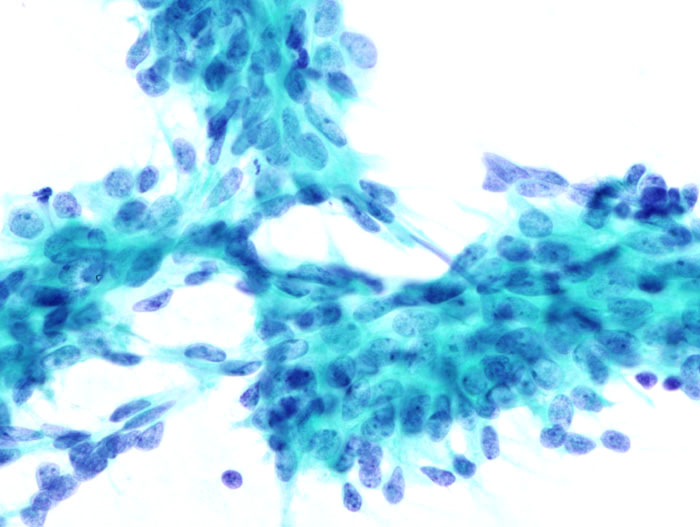

In [3]:
Image('https://upload.wikimedia.org/wikipedia/commons/8/8b/Breast_fibroadenoma_by_fine_needle_aspiration_%282%29_PAP_stain.jpg', width = 600)

*Fine needle aspiration of fibroadenoma, a type of benign breast tumor. (Source: Wikimedia)*

Today, we'll be using the **Wisconsin Diagnostic Breast Cancer (WDBC) dataset**. 

The [original repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+\(Diagnostic\)) contains several versions of the breast cancer data. For today we're interested in Dr. Wolberg's original encodings of the FNA image data, which uses a ranking of 1 to 10 to describe a variety of attributes such unifority of cell shape and size, mitoses and normal nuclei count, margin adhesion, clump thickness, and so on.

Let's suppose we are researchers at Big University Oncology Institute working with fine needle aspirate (FNA) images of breast masses. Our long-term goal is to increase the efficacy of clinicians in distinguishing malignant from non-malignant masses in FNA digital images.

Given our research questions, how might we wish to explore a dataset where observations correspond to fine needle aspiration (FNA) images of breast growths? What's important to us?

(**Edit this box to include a question you would like to investigate in this data.**)

## 1. Import your data into a pandas dataframe

Let's get started. First, let's import the pandas and numpy library:

In [0]:
import pandas as pd
import numpy as np

In [0]:
remote_data_URL = 'https://raw.githubusercontent.com/zoews/tidy-tuesday/master/wisconsin_data.csv'

In [0]:
diagnostic_data = pd.read_csv(remote_data_URL)

In pandas, a DataFrame is a data type that allows us to use special functions. When a function is relative to an object, we call it a **method** and access it with a period at the end of the object. So, for example, print is a standalone function:

```
print("Hello world")
```

But .head() is a pandas **method** that must be called on a pandas DataFrame:

```
diagnostic_data.head()
```

.head() usefully shows us the first several rows in our DataFrame along with row and column labels. Let's try it below, passing in `20` to show the first 20 rows:

In [7]:
diagnostic_data.head(20)

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


Oh no! Take a look at the header line. What do you think is going on here?

In [0]:
diagnostic_data = pd.read_csv(remote_data_URL, header=None)

Now let's take a look:

In [9]:
diagnostic_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Okay, halfway there! We can use the DataFrame as is, but it will be frustrating not to rely on actual column names. We need to dig into the data documentation itself to figure out the best labels in this case. 

Here's the relevant part of our data readme:

```
7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```

To assign a header to a DataFrame without column labels (or to replace existing Column labels), we can use a list of strings.

In [0]:
attribute_labels = ['sample_code', 
                    'clump_thickness', 
                    'uniformity_cell_shape', 
                    'uniformity_cell_size',
                    'marginal_adhesion',
                    'single_epi_cell_size',
                    'bare_nuclei',
                    'bland_chrom',
                    'norm_nuclei',
                    'mitoses',
                    'mass_class'
                   ]

In [0]:
diagnostic_data.columns = attribute_labels

In [12]:
diagnostic_data.uniformity_cell_size

0       1
1       4
2       1
3       8
4       1
       ..
694     1
695     1
696    10
697     6
698     8
Name: uniformity_cell_size, Length: 699, dtype: int64

You should see a nicely labeled table output to the Notebook above. Congrats! Your data is definitively imported into a DataFrame.

Note that pandas will create an index and assign ordered values beginning at 0 by default. You can override this behavior (as in, you could set sample_code as the index) but it's helpful to have this index in place for future use, e.g. if we wanted to reverse the order of our data and sample_code wasn't sequential. [Here is a helpful resource](https://t.co/swUeOFoc33?amp=1) for learning more about index behavior in pandas.

## 2. Tidy your data: identify and respond to weirdness!

For us to consider a dataset a tidy dataset, it must follow three principles (Wickham, 2013):

> 1. Each variable forms a column.
> 2. Each observation forms a row.
> 3. Each type of observational unit forms a table

We can also express this visually:

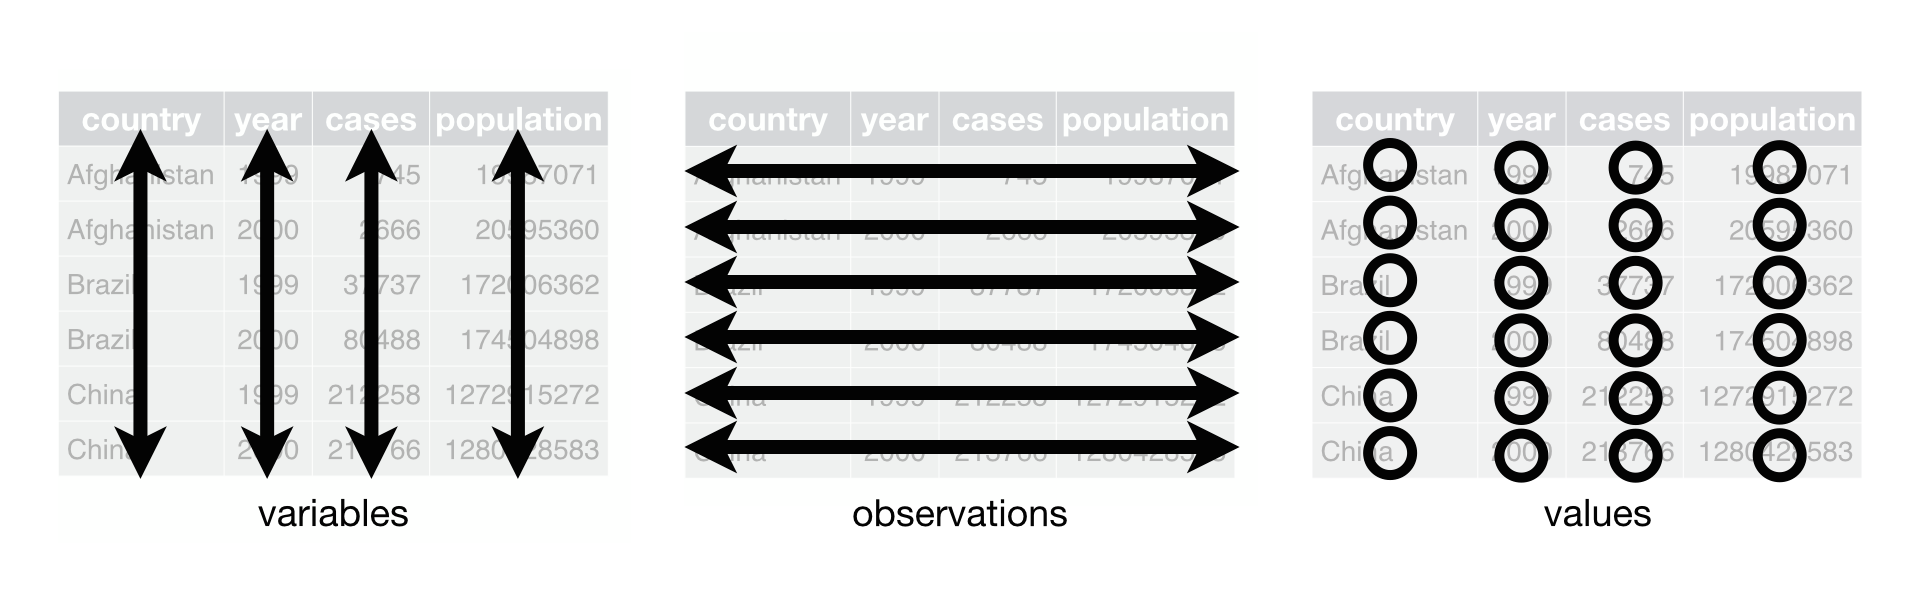

In [13]:
Image('https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png', width=800)

(Source: ["12. Tidy Data"](https://r4ds.had.co.nz/tidy-data.html), *R for Data Science*. Wickham and Grolemund, 2017)

We've already made one significant change to make our DataFrame **tidy** - manually declaring a header! If we leave the distinction between header and first row ambiguous, we lose the integrity of the tidy data structure where each row corresponds to an observation, and *only* an observation.

Another concern is empty, missing, or **null values**. 

### Hunting for nulls

To check for null values in our diagnostic data, we may wish to use the following syntax: `diagnostic_data.isnull().any()`. What this does:

* 'diagnostic_data' is our DataFrame of FNA image data observations
* `.isnull()` is a method that returns True or False if a null value is found, per value in our dataframe
* `.any()` looks for a single True value in any column and returns the outcome.

Let's look at the result:

In [14]:
diagnostic_data.isnull().any()

sample_code              False
clump_thickness          False
uniformity_cell_shape    False
uniformity_cell_size     False
marginal_adhesion        False
single_epi_cell_size     False
bare_nuclei              False
bland_chrom              False
norm_nuclei              False
mitoses                  False
mass_class               False
dtype: bool

Looks good, right? However, we are assuming that pandas would spit out nulls in the DataFrame - what if our DataFrame is not operating under these principles?

Let's take a look using the `.info()` method (or we could use the `.dtypes` attribute, your choice!)


In [15]:
diagnostic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code              699 non-null int64
clump_thickness          699 non-null int64
uniformity_cell_shape    699 non-null int64
uniformity_cell_size     699 non-null int64
marginal_adhesion        699 non-null int64
single_epi_cell_size     699 non-null int64
bare_nuclei              699 non-null object
bland_chrom              699 non-null int64
norm_nuclei              699 non-null int64
mitoses                  699 non-null int64
mass_class               699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


What do you notice?

The `.unique()` method can be used on a DataFrame column to show all unique values. For instance, if we want to see all of the unique values for mitoses, we could run the following:

In [16]:
diagnostic_data['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

Write code below to view the unique values in our DataFrame showing unexpected behavior:

In [17]:
diagnostic_data['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

To chck how prevelant the unexpected value is in our data, let's replace the `.unique()` method call with `.value_counts()`, which provides counts for each unique value.

In [18]:
# Write code below that generates counts for each unique value in the column we are investigating.
diagnostic_data['bare_nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

To treat this variable as numeric, but also include null values, we must use the floating point numeric data type. If we try to convert this data directly to floating point right now, however, it will produce an error. We thus need to use a two-step process:

* `.replace()` to convert our offending character to NumPy NaN object, which you can generate with `np.nan`
* `.astype()` which will allow us to coerce eligible data to floating point numeric, or `'float64'`

In [0]:
diagnostic_data.bare_nuclei.replace('?',np.nan, inplace=True)

In [0]:
diagnostic_data.bare_nuclei = diagnostic_data.bare_nuclei.astype('float64')

Let's check to see if our DataFrame now includes nulls that pandas can recognize, and also stores bare-nuclei in the correct data type:

In [21]:
diagnostic_data.isnull().any()

sample_code              False
clump_thickness          False
uniformity_cell_shape    False
uniformity_cell_size     False
marginal_adhesion        False
single_epi_cell_size     False
bare_nuclei               True
bland_chrom              False
norm_nuclei              False
mitoses                  False
mass_class               False
dtype: bool

In [22]:
diagnostic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code              699 non-null int64
clump_thickness          699 non-null int64
uniformity_cell_shape    699 non-null int64
uniformity_cell_size     699 non-null int64
marginal_adhesion        699 non-null int64
single_epi_cell_size     699 non-null int64
bare_nuclei              683 non-null float64
bland_chrom              699 non-null int64
norm_nuclei              699 non-null int64
mitoses                  699 non-null int64
mass_class               699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


Now you must make a decision: do you exclude observations with null values? Why or why not? If you wanted to exclude those observations, you could filter by null or non-null.

To set a filter condition, you use brackets with a statement to evaluate in Python. Ex:

In [23]:
diagnostic_data[diagnostic_data.clump_thickness > 5]

,sample_code,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,mass_class
3,1016277,6,8,8,1,3,4.0,3,7,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
14,1044572,8,7,5,10,7,9.0,5,5,4,4
15,1047630,7,4,6,4,6,1.0,4,3,1,4
18,1050670,10,7,7,6,4,10.0,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...
630,1225382,6,2,3,1,2,1.0,1,1,1,2
633,1253955,8,7,4,4,5,3.0,5,10,1,4
636,1268952,10,10,7,8,7,1.0,10,10,3,4
658,1334015,7,8,8,7,3,10.0,7,2,3,4


To check for a null value, pandas requires us to use the `.isnull()` method which will return either true or false. Calling this on the `bare_nuclei` column will return observations (rows) that contain a null value for `bare_nulcei`, regardless of the null status of other variables for that observation.

In [32]:
diagnostic_data[diagnostic_data.bare_nuclei.isnull()]

,sample_code,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,mass_class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In some cases, we would rather exclude nulls entirely. Instead of filtering for the observations containing a null, we could filter for all non-null observations by either 

1. Using the `.notnull()` method or 
2. Negating our filter condition by using the `~` prefix.

How would you use a filter to exclude nulls in the column we've been focusing on in this example?

In [33]:
diagnostic_data[~diagnostic_data.bare_nuclei.isnull()]

,sample_code,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,mass_class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


### Encode benign/malignant class as categorical

In [34]:
# Our DataFrame currently encodes the benign/malignant class in the 'mass_class' column
# Use the value_counts() method to learn about the distribution of values for this variable.

diagnostic_data.mass_class.value_counts()

2    458
4    241
Name: mass_class, dtype: int64

When working with a class or categorical variable, we often wish to instruct pandas to treat this column as categorical data (as opposed to numeric, an object, etc.) NumPy has yet another `dtype` precisely for this: `category`. But how do we go from numeric to categorical?

Earlier, we used the `.replace()` method above to replace `?` with `np.nan`. In addition to replacing a single value, we can replace multiple values at the same time. To do this, we can pass in a dictionary.

Uncomment the block below and replace the number-string pairs with the class labels provided for our data (see the '7. Attribute Information' table above)

In [0]:
# This dictionary will match numeric values with our category/class labels, as per the data documentation
to_replace = {
    2: "benign",
    4: "malignant"    
}
# Below, use the replace method to convert our numeric values in mass_class with our new labels
# HINT: we can pass a dictionary directly into .replace()

diagnostic_data.mass_class = diagnostic_data.mass_class.replace(to_replace)

Now, let's coerce the entire column to be of type 'category'. Enter the code below.

In [0]:
diagnostic_data.mass_class = diagnostic_data.mass_class.astype('category')

In [37]:
diagnostic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code              699 non-null int64
clump_thickness          699 non-null int64
uniformity_cell_shape    699 non-null int64
uniformity_cell_size     699 non-null int64
marginal_adhesion        699 non-null int64
single_epi_cell_size     699 non-null int64
bare_nuclei              683 non-null float64
bland_chrom              699 non-null int64
norm_nuclei              699 non-null int64
mitoses                  699 non-null int64
mass_class               699 non-null category
dtypes: category(1), float64(1), int64(9)
memory usage: 55.5 KB


### Anything else?

In [38]:
# hint: nunique() gives count of unique values (as opposed to total number of values)

diagnostic_data.nunique()

sample_code              645
clump_thickness           10
uniformity_cell_shape     10
uniformity_cell_size      10
marginal_adhesion         10
single_epi_cell_size      10
bare_nuclei               10
bland_chrom               10
norm_nuclei               10
mitoses                    9
mass_class                 2
dtype: int64

In [39]:
diagnostic_data.shape

(699, 11)

If you compare the column length to the column unique values in our DataFrame, you will see that there are actually 54 fewer unique values in `sample_code` than we would have expected if we considered `sample_code` to refer to unique measurements. In other words, in some cases multiple observations must share the sample `sample_code` value.

This means that we must think further about what consistutes a `sample_code` value. Should we discard repeats? Or is this irrelevant to our analysis given that our analysis is on the observation level, not on the individual or sample code level? Something to think about!

## 3. Explore your data: summarize, visualize, transform


REMINDER: What are our research questions?

Let's identify some specific tasks that may be helpful:
* Learn the overall size, shape, and scope of our FNA imaging data.
* Summarize the distribution for each image attribute.
* Explore possible correlations between image attributes.
* Aggregate observations by class and compare

### a. Learn the overall size, shape, and scope of our FNA imaging data.

When getting oriented to a new dataset, I like to see a few examples of observations, and also make sure the data is in a format I expect.

We've already seen `.head()` and `.info()`. Let's also add in `.tail()`, which just shows the bottom 5 items. We can also pass in a parameter to see the nth rows from the bottom.

In [40]:
diagnostic_data.tail()

,sample_code,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses,mass_class
694,776715,3,1,1,1,3,2.0,1,1,1,benign
695,841769,2,1,1,1,2,1.0,1,1,1,benign
696,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,897471,4,8,6,4,3,4.0,10,6,1,malignant
698,897471,4,8,8,5,4,5.0,10,4,1,malignant


If you want to quickly view the overall dimensions of your DataFrame, the most concise way is to use `.shape`

Unlike .head(), which is a **method** (or function that belongs to our DataFrame object), .shape is an **atribute** meaning that it returns some data about the object. 

In [42]:
# Do you think shape uses .shape or .shape() syntax? Try it out

diagnostic_data.shape

(699, 11)

### b. Summary statistics and distributions for each image attribute.

We now have a big-picture view of how our dataframe is organized, but we don't yet know much about the individual columns. What is the distribution of values within a given column? How do they compare to one another?

First, run the `.columns` attribute call on our dataframe to remind us of all available columns:

In [43]:
diagnostic_data.columns

Index(['sample_code', 'clump_thickness', 'uniformity_cell_shape',
       'uniformity_cell_size', 'marginal_adhesion', 'single_epi_cell_size',
       'bare_nuclei', 'bland_chrom', 'norm_nuclei', 'mitoses', 'mass_class'],
      dtype='object')

Now, let's get a visual sense of the distirbution of values within each column. First, let's see this as a big matrix using the .describe() method.

In [44]:
diagnostic_data.describe()

,sample_code,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Pandas supports visualization using the matplotlib library natively, which is very helpful for our purposes. To make this work within a notebook, we simply need to import matplotlib, and then specify that we want to see inline visualizations with a "magic command" (the magic command is specific to Jupyter Notebooks):

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

We can generate side-by-side histograms of all our columns by calling the `.hist()` method on our DataFrame. It's not necessary to specify paramters, but for readability, it's helpful to set the `figsize` parameter to an `(x, y)` tuple, in inches:

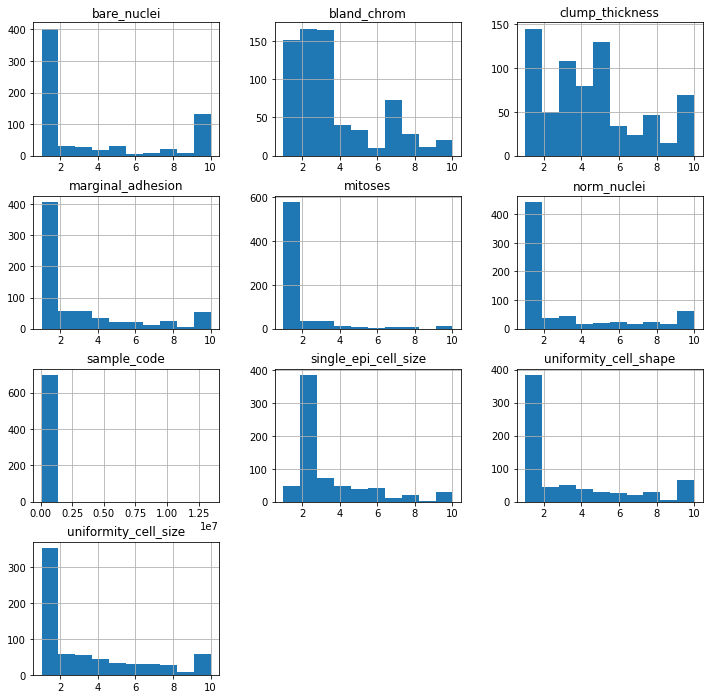

In [46]:
our_plot = diagnostic_data.hist(figsize=(12,12))

We can pair this code with the column select syntax `DataFrame[["Column A", "Column B"...]]` to compare just a subset of columns. Unlike the dot format of referencing a column (which is my favorite for most situations), the bracket format allows you to pass in a list of columns, which is helpful for subsetting. If you write code this way, note that you need two brackets, and the column names must now be passed in as strings (and thus must be surrounded by quotation marks).


In [47]:
diagnostic_data[['bare_nuclei', 'clump_thickness']].mean()

bare_nuclei        3.544656
clump_thickness    4.417740
dtype: float64

In [0]:
## Add your own code to compare the distribution of two other variables here!

Now let's explore a given column. You can always start with describe:

In [48]:
# call describe on clump_thickness
diagnostic_data.clump_thickness.describe()

count    699.000000
mean       4.417740
std        2.815741
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: clump_thickness, dtype: float64

But you may wish to extract specific information from a particular column such as the mean, median, sum, count, etc. All of these can be called as methods on pandas DataFrame column (which is equivalent to a pandas Series), such as `df.MY_COLUMN.sum()` or `df.MY_COLUMN.mean()`. Try it out below:

In [0]:
# your code here

You can also write this method call using the bracket notation for referencing a column, such as df['MY_COLUMN'].sum()

In [0]:
# your code here

### c. Possible correlations between image attributes.

Let's visualize correlations!

We can start with calling the .corr() method on our DataFrame

In [51]:
diagnostic_data.corr()

,sample_code,clump_thickness,uniformity_cell_shape,uniformity_cell_size,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chrom,norm_nuclei,mitoses
sample_code,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.099248,-0.060051,-0.052072,-0.034901
clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034
uniformity_cell_shape,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693
uniformity_cell_size,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911
marginal_adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633
single_epi_cell_size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101
bare_nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210
bland_chrom,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169
norm_nuclei,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336
mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000


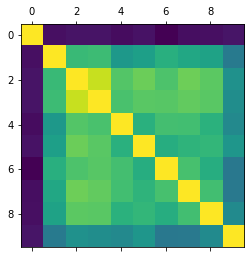

In [0]:
# You can also pass a correlation matrix directly into the pyplot .matshow() method to visualize
# Remember that we previously important matplotlib.pyplot as plt to give us quick access
# To functionlity from the plot object

plt.matshow(diagnostic_data.corr())

matplotlib is only so-so at visualization correlations. Let's use seaborn instead.

In [0]:
import seaborn as sns

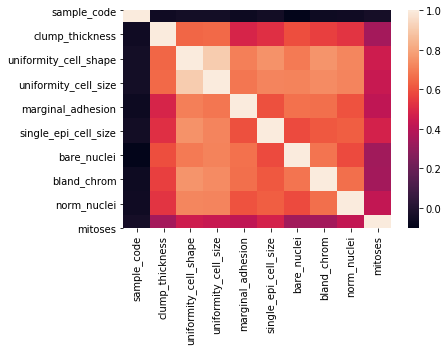

In [55]:
# Like matplotlib, seaborn is good at working natively with pandas DataFrames
# But seaborn includes additional functionality, such as generating axis labels automatically
# And neat color schemes

sns.heatmap(diagnostic_data.corr())

If you'd like to try more seaborn visualizations, take a look at some [more examples](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

### d. Aggregate observations by class and compare

Here we will focus on the `.groupby()` method and the concept of the **index** in a DataFrame

mass_class
benign       [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
malignant    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

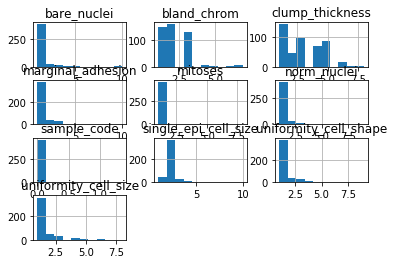

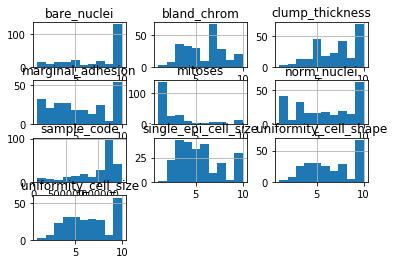

In [56]:
diagnostic_data.groupby('mass_class').hist()

`.hist()` is a good start, but let's use seaborn to see a little more clearly.

To benefit from seaborn's visualization strengths, let's use the seaborn method [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

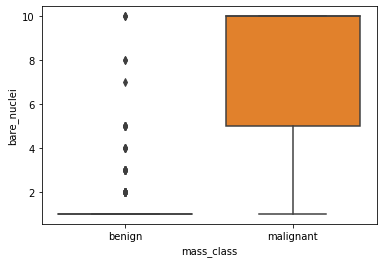

In [66]:
sns.boxplot(x='mass_class', y='bare_nuclei', data = diagnostic_data)

In [0]:
# compare the distribution of another possible predictor variable here

## 4. Evaluate modeling methods (e.g. classification)

We've tidied up our dataset, including dealing with headers and nulls; glimpsed the design, shape, and typical observations within our datset; explored summary statistics and distributions of values within columns; and evaluated covariance between columns with correlation plots and heat maps. 

Each of these tasks are valuable in their own right, no matter what analytical method we wish to pursue next. 

### Let's save our work.

In [0]:
diagnostic_data.to_csv("wisconsin_data_clean.csv")

# if you are running this file locally through jupyter notebook
# the line of code will generate a file in the same directory as your notebook

# if you are running this on Colab, you will need to follow one more step:
# after running this cell, click on the collapsed sidebar on the left
# (or click View-> Table of contents in menu) and navgiate to Files
# You can download the file you created locally or into your drive

### Avenues for subsequent analysis (e.g. designing a machine learning classification task)

The data work you've done in pandas is *particularly* relevant if we plan to approach this research question

> we are interested in whether patterns exist in imaging data that would improve the ability of clinicians to correctly dinstinguish malignant and non-malignant tumors

as the classification task

> Given the output class of "malignant" or "benign" in our observations, can we generate an accurate and reliable prediction from observations about Fine Needle Aspiration images (also contained within our observations)? If so, what variables are singificant in predicting an outcome class effectively? Among those important predictors, how would a change in measurement value influence the likely outcome, and how confident are we in that influence?

Now that we have our data in a tidy dataframe, those observations include a outcome class variable as well as several storng candidate for predictor variables. This is an excellent task to pursue via the supervised machine learning method of [binary classification](https://www.sciencedirect.com/topics/computer-science/binary-classification).

In the Python ecosystem, most if not all popular machine learning packages will work natively with pandas DataFrames. Look out for a future lesson using random forest classifers with scikit-learn on this very dataset you have prepared!

## Appendix: Full readme file

Full readme file accompanying data:

```
Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

1. Title: Wisconsin Breast Cancer Database (January 8, 1991)

2. Sources:
   -- Dr. WIlliam H. Wolberg (physician)
      University of Wisconsin Hospitals
      Madison, Wisconsin
      USA
   -- Donor: Olvi Mangasarian (mangasarian@cs.wisc.edu)
      Received by David W. Aha (aha@cs.jhu.edu)
   -- Date: 15 July 1992

3. Past Usage:

   Attributes 2 through 10 have been used to represent instances.
   Each instance has one of 2 possible classes: benign or malignant.

   1. Wolberg,~W.~H., \& Mangasarian,~O.~L. (1990). Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology. In
      {\it Proceedings of the National Academy of Sciences}, {\it 87},
      9193--9196.
      -- Size of data set: only 369 instances (at that point in time)
      -- Collected classification results: 1 trial only
      -- Two pairs of parallel hyperplanes were found to be consistent with
         50% of the data
         -- Accuracy on remaining 50% of dataset: 93.5%
      -- Three pairs of parallel hyperplanes were found to be consistent with
         67% of data
         -- Accuracy on remaining 33% of dataset: 95.9%

   2. Zhang,~J. (1992). Selecting typical instances in instance-based
      learning.  In {\it Proceedings of the Ninth International Machine
      Learning Conference} (pp. 470--479).  Aberdeen, Scotland: Morgan
      Kaufmann.
      -- Size of data set: only 369 instances (at that point in time)
      -- Applied 4 instance-based learning algorithms 
      -- Collected classification results averaged over 10 trials
      -- Best accuracy result: 
         -- 1-nearest neighbor: 93.7%
         -- trained on 200 instances, tested on the other 169
      -- Also of interest:
         -- Using only typical instances: 92.2% (storing only 23.1 instances)
         -- trained on 200 instances, tested on the other 169

4. Relevant Information:

   Samples arrive periodically as Dr. Wolberg reports his clinical cases.
   The database therefore reflects this chronological grouping of the data.
   This grouping information appears immediately below, having been removed
   from the data itself:

     Group 1: 367 instances (January 1989)
     Group 2:  70 instances (October 1989)
     Group 3:  31 instances (February 1990)
     Group 4:  17 instances (April 1990)
     Group 5:  48 instances (August 1990)
     Group 6:  49 instances (Updated January 1991)
     Group 7:  31 instances (June 1991)
     Group 8:  86 instances (November 1991)
     -----------------------------------------
     Total:   699 points (as of the donated datbase on 15 July 1992)

   Note that the results summarized above in Past Usage refer to a dataset
   of size 369, while Group 1 has only 367 instances.  This is because it
   originally contained 369 instances; 2 were removed.  The following
   statements summarizes changes to the original Group 1's set of data:

   #####  Group 1 : 367 points: 200B 167M (January 1989)
   #####  Revised Jan 10, 1991: Replaced zero bare nuclei in 1080185 & 1187805
   #####  Revised Nov 22,1991: Removed 765878,4,5,9,7,10,10,10,3,8,1 no record
   #####                  : Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial
   #####                  : Changed 0 to 1 in field 6 of sample 1219406
   #####                  : Changed 0 to 1 in field 8 of following sample:
   #####                  : 1182404,2,3,1,1,1,2,0,1,1,1

5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

9. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

```